In [6]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans

In [7]:
df_sentence = pd.read_csv("./dataset2.csv", dtype={'label': 'str', 'predict':'str'}, encoding="utf-8")

In [8]:
article_predlabel = []
for i in range(len(df_sentence)):
    value = np.array([r for r in df_sentence["predict"][i]])
    article_predlabel.append(value)
    

In [9]:
df_sentence.head()

,Unnamed: 0,parentid,childid,body,label,predict
0,0,0,0,米連邦準備理事会（FRB）傘下のニューヨーク連銀は31日、2回のレポを通じ175億ドルの資金...,0000000000000,00000000000001
1,1,0,1,内訳は4日物が135億ドル、2日物が40億ドル,0000000000000,00000000000001
2,2,0,2,受け入れ担保は、4日物が米国債15億ドル、政府機関債80億5000万ドル、モーゲージ担保証券...,0000000000100,00000000001000
3,3,0,3,2日物は米国債3億8800万ドル、政府機関債28億2500万ドル、MBS7億8700万ドル,0000000000000,00000000000001
4,4,0,4,応札額は4日物が166億ドル、2日物が66億ドルだった,0100000000000,01000000000000


In [30]:
from sklearn.decomposition import PCA
from matplotlib import pyplot as plt
pca = PCA()
pca.fit(article_predlabel)
transformed = pca.fit_transform(article_predlabel)
plt.scatter(transformed[:, 0], transformed[:, 1])
plt.title('principan component')
plt.xlabel('pc1')
plt.ylabel('pc2')
print(pca.explained_variance_ratio_)

[ 0.55469854  0.17961853  0.07468836  0.04365827  0.03460774  0.02832544
  0.02081483  0.01592214  0.01401514  0.01219685  0.00958979  0.00632522
  0.00413274  0.00140641]


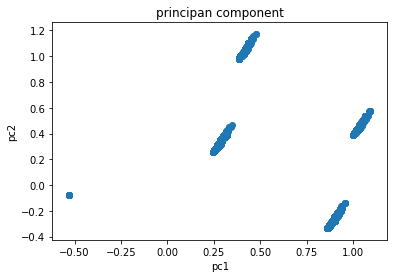

In [31]:
plt.show()

In [4]:
pred = KMeans(n_clusters=14).fit_predict(article_predlabel)

In [5]:
pred

array([0, 0, 5, ..., 9, 0, 0], dtype=int32)

In [6]:
cluster_df = pd.DataFrame({'pred': pred,\
                           'keiki':[article_predlabel[i][0] for i in range(len(article_predlabel))],\
                           'bukka':[article_predlabel[i][1] for i in range(len(article_predlabel))],\
                           'kinri':[article_predlabel[i][2] for i in range(len(article_predlabel))],\
                          'money':[article_predlabel[i][3] for i in range(len(article_predlabel))],\
                          'boueki':[article_predlabel[i][4] for i in range(len(article_predlabel))],\
                          'koyou':[article_predlabel[i][5] for i in range(len(article_predlabel))],\
                          'kojin':[article_predlabel[i][6] for i in range(len(article_predlabel))],\
                          'kainyu':[article_predlabel[i][7] for i in range(len(article_predlabel))],\
                          'oil':[article_predlabel[i][8] for i in range(len(article_predlabel))],\
                          'kabu':[article_predlabel[i][9] for i in range(len(article_predlabel))],\
                          'saiken':[article_predlabel[i][10] for i in range(len(article_predlabel))],\
                          'youjin':[article_predlabel[i][11] for i in range(len(article_predlabel))],\
                          'seiji':[article_predlabel[i][12] for i in range(len(article_predlabel))],\
                          'sonota':[article_predlabel[i][13] for i in range(len(article_predlabel))]})

In [15]:
cluster_df['pred'].value_counts()

0     126956
1      53656
3      18570
9       5047
2       4865
5       4793
8       4638
4       3115
13      2688
7       1845
6       1553
11      1440
10      1116
12      1100
Name: pred, dtype: int64

In [10]:
cluster_df.head()

,boueki,bukka,kabu,kainyu,keiki,kinri,kojin,koyou,money,oil,pred,saiken,seiji,sonota,youjin
0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
2,0,0,0,1,0,0,0,0,0,0,5,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
4,1,0,0,0,0,0,0,0,0,0,6,0,0,0,0


In [17]:
cluster_df[cluster_df['pred'] == 0]

AttributeError: 'DataFrame' object has no attribute 'value_counts'

In [29]:
cluster_df[cluster_df['pred'] == 2].mean()

boueki    0.000000
bukka          inf
kabu      0.000000
kainyu    0.000000
keiki     0.000000
kinri          inf
kojin     0.000000
koyou     0.000000
money     0.000000
oil            inf
pred      2.000000
saiken    0.000000
seiji     0.000000
sonota    0.000000
youjin         inf
dtype: float64

In [35]:
cluster_df[cluster_df['pred'] == 2].value_counts()

AttributeError: 'DataFrame' object has no attribute 'value_counts'